# Determinando força do concreto com modelos de regressão

Dataset do Kaggle: https://www.kaggle.com/pavanraj159/concrete-compressive-strength-data-set 

Importando bibliotecas para manipulação e visualização dos dados

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Lendo Arquivo CSV

In [2]:
dados = pd.read_csv('compresive_strength_concrete.csv')

Exibindo cinco primeiras linhas

In [3]:
dados.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
dados.columns = ['Cement','Blast Furnace Slag','Fly Ash','Water','Superplasticizer','Coarse Aggregate','Fine Aggregate','Age','Compressive strength']

In [5]:
dados.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Exibindo informações dos dados

In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cement                1030 non-null   float64
 1   Blast Furnace Slag    1030 non-null   float64
 2   Fly Ash               1030 non-null   float64
 3   Water                 1030 non-null   float64
 4   Superplasticizer      1030 non-null   float64
 5   Coarse Aggregate      1030 non-null   float64
 6   Fine Aggregate        1030 non-null   float64
 7   Age                   1030 non-null   int64  
 8   Compressive strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


Verificando se existem NaNs

In [7]:
print(dados.isna().sum())

Cement                  0
Blast Furnace Slag      0
Fly Ash                 0
Water                   0
Superplasticizer        0
Coarse Aggregate        0
Fine Aggregate          0
Age                     0
Compressive strength    0
dtype: int64


Visualização dos dados

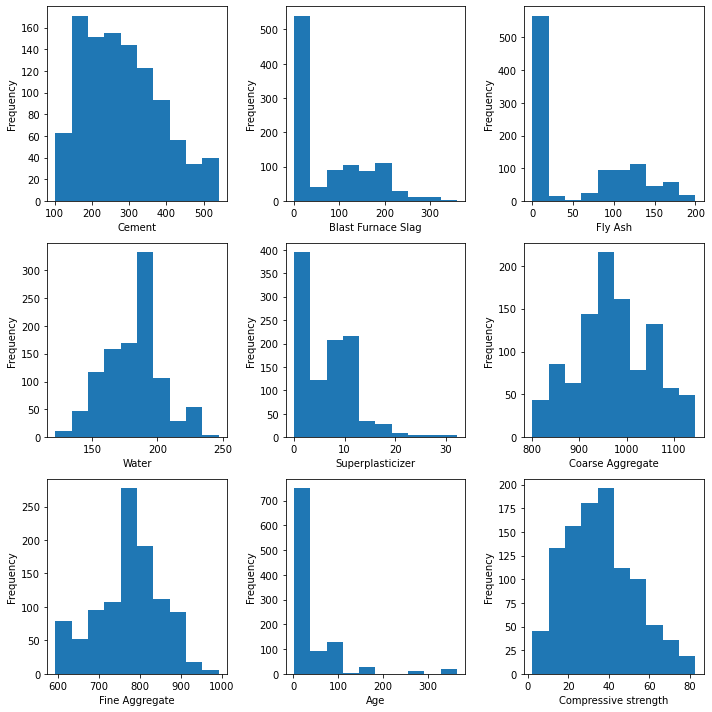

In [8]:
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
dados[dados.columns[0]].plot(kind='hist')
plt.xlabel(dados.columns[0])
plt.subplot(3,3,2)
dados[dados.columns[1]].plot(kind='hist')
plt.xlabel(dados.columns[1])
plt.subplot(3,3,3)
dados[dados.columns[2]].plot(kind='hist')
plt.xlabel(dados.columns[2])
plt.subplot(3,3,4)
dados[dados.columns[3]].plot(kind='hist')
plt.xlabel(dados.columns[3])
plt.subplot(3,3,5)
dados[dados.columns[4]].plot(kind='hist')
plt.xlabel(dados.columns[4])
plt.subplot(3,3,6)
dados[dados.columns[5]].plot(kind='hist')
plt.xlabel(dados.columns[5])
plt.subplot(3,3,7)
dados[dados.columns[6]].plot(kind='hist')
plt.xlabel(dados.columns[6])
plt.subplot(3,3,8)
dados[dados.columns[7]].plot(kind='hist')
plt.xlabel(dados.columns[7])
plt.subplot(3,3,9)
dados[dados.columns[8]].plot(kind='hist')
plt.xlabel(dados.columns[8])
plt.tight_layout()

Verificando correlação entre as variáveis

In [9]:
corr = dados.corr()

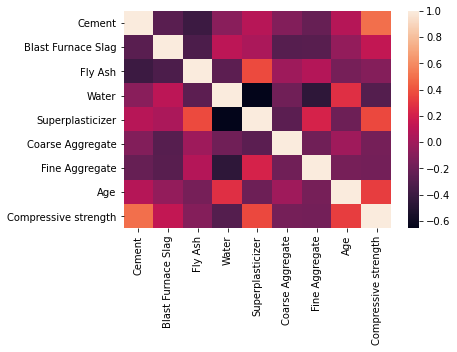

In [10]:
sns.heatmap(corr)

Normalizando valores no intervalo entre 0 e 1

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
colunas = dados.columns

In [13]:
for col in colunas:
    scaler = MinMaxScaler(feature_range=(0, 1))
    dados[col] = scaler.fit_transform(dados[col].values.reshape(-1, 1))

In [14]:
dados.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Compressive strength
0,1.000000,0.000000,0.0,0.321086,0.07764,0.694767,0.205720,0.074176,0.967485
1,1.000000,0.000000,0.0,0.321086,0.07764,0.738372,0.205720,0.074176,0.741996
2,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.000000,0.739011,0.472655
3,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.000000,1.000000,0.482372
4,0.220548,0.368392,0.0,0.560703,0.00000,0.515698,0.580783,0.986264,0.522860


Determinando variáveis X e Y

In [15]:
X = dados[colunas[0:-1]].values
Y = dados[dados.columns[-1]].values

Criando amostras de treino e teste

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.25, random_state=42)

Importando bibliotecas para cálculo dos erros dos modelos

In [19]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

Criando função para cálculo do erro percentual absoluto médio

In [20]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

Modelo 1: Regressão Linear

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
linreg = LinearRegression()

In [23]:
linreg.fit(X_treino,Y_treino)

LinearRegression()

In [24]:
Y_pred_linreg = linreg.predict(X_teste)

In [25]:
MAE_linreg = mean_absolute_error(Y_teste,Y_pred_linreg)
MSE_linreg = mean_squared_error(Y_teste,Y_pred_linreg)
RMSE_linreg = np.sqrt(MSE_linreg)
MAPE_linreg = mean_absolute_percentage_error(Y_teste,Y_pred_linreg)

In [26]:
print("MAE = {:0.2f}".format(MAE_linreg))
print("MAPE = {:0.2f}%".format(MAPE_linreg))
print("MSE = {:0.2f}".format(MSE_linreg))
print("RMSE = {:0.2f}".format(RMSE_linreg))

MAE = 0.10
MAPE = 38.83%
MSE = 0.02
RMSE = 0.13


Modelo 2: Support Vector Regressor

In [27]:
from sklearn.svm import SVR

In [28]:
svr = SVR()

In [29]:
svr.fit(X_treino,Y_treino)

SVR()

In [30]:
Y_pred_svr = svr.predict(X_teste)

In [31]:
MAE_svr = mean_absolute_error(Y_teste,Y_pred_svr)
MSE_svr = mean_squared_error(Y_teste,Y_pred_svr)
RMSE_svr = np.sqrt(MSE_svr)
MAPE_svr = mean_absolute_percentage_error(Y_teste,Y_pred_svr)

In [32]:
print("MAE = {:0.2f}".format(MAE_svr))
print("MAPE = {:0.2f}%".format(MAPE_svr))
print("MSE = {:0.2f}".format(MSE_svr))
print("RMSE = {:0.2f}".format(RMSE_svr))

MAE = 0.07
MAPE = 28.55%
MSE = 0.01
RMSE = 0.09


Modelo 3: Decision Tree Regressor

In [33]:
from sklearn.tree import DecisionTreeRegressor

In [34]:
dte = DecisionTreeRegressor()

In [35]:
dte.fit(X_treino,Y_treino)

DecisionTreeRegressor()

In [36]:
Y_pred_dte = dte.predict(X_teste)

In [37]:
MAE_dte = mean_absolute_error(Y_teste,Y_pred_dte)
MSE_dte = mean_squared_error(Y_teste,Y_pred_dte)
RMSE_dte = np.sqrt(MSE_dte)
MAPE_dte = mean_absolute_percentage_error(Y_teste,Y_pred_dte)

In [38]:
print("MAE = {:0.2f}".format(MAE_dte))
print("MAPE = {:0.2f}%".format(MAPE_dte))
print("MSE = {:0.2f}".format(MSE_dte))
print("RMSE = {:0.2f}".format(RMSE_dte))

MAE = 0.06
MAPE = 17.12%
MSE = 0.01
RMSE = 0.09


Modelo 4: Random Forest Regressor

In [39]:
from sklearn.ensemble import RandomForestRegressor

In [40]:
rfr = RandomForestRegressor()

In [41]:
rfr.fit(X_treino,Y_treino)

RandomForestRegressor()

In [42]:
Y_pred_rfr = rfr.predict(X_teste)

In [43]:
MAE_rfr = mean_absolute_error(Y_teste,Y_pred_rfr)
MSE_rfr = mean_squared_error(Y_teste,Y_pred_rfr)
RMSE_rfr = np.sqrt(MSE_rfr)
MAPE_rfr = mean_absolute_percentage_error(Y_teste,Y_pred_rfr)

In [44]:
print("MAE = {:0.2f}".format(MAE_rfr))
print("MAPE = {:0.2f}%".format(MAPE_rfr))
print("MSE = {:0.2f}".format(MSE_rfr))
print("RMSE = {:0.2f}".format(RMSE_rfr))

MAE = 0.05
MAPE = 14.74%
MSE = 0.00
RMSE = 0.07


Modelo 5: AdaBoost Regressor

In [45]:
from sklearn.ensemble import AdaBoostRegressor

In [46]:
ada = AdaBoostRegressor()

In [47]:
ada.fit(X_treino,Y_treino)

AdaBoostRegressor()

In [48]:
Y_pred_ada = ada.predict(X_teste)

In [49]:
MAE_ada = mean_absolute_error(Y_teste,Y_pred_ada)
MSE_ada = mean_squared_error(Y_teste,Y_pred_ada)
RMSE_ada = np.sqrt(MSE_ada)
MAPE_ada = mean_absolute_percentage_error(Y_teste,Y_pred_ada)

In [50]:
print("MAE = {:0.2f}".format(MAE_ada))
print("MAPE = {:0.2f}%".format(MAPE_ada))
print("MSE = {:0.2f}".format(MSE_ada))
print("RMSE = {:0.2f}".format(RMSE_ada))

MAE = 0.08
MAPE = 35.54%
MSE = 0.01
RMSE = 0.10


In [51]:
modelo = ["Regressão linear","SVR","Decion Tree","Random Forest","Ada Boost"]
MAE = [MAE_linreg,MAE_svr,MAE_dte,MAE_rfr,MAE_ada]
MAPE = [MAPE_linreg,MAPE_svr,MAPE_dte,MAPE_rfr,MAPE_ada]
MSE = [MSE_linreg,MSE_svr,MSE_dte,MSE_rfr,MSE_ada]
RMSE = [RMSE_linreg,RMSE_svr,RMSE_dte,RMSE_rfr,RMSE_ada]

In [52]:
dici = {"Modelo" : modelo, "MAE" : MAE, "MAPE" : MAPE, "MSE" : MSE, "RMSE" : RMSE}

In [53]:
pd_dici = pd.DataFrame(dici).sort_values(by="MAPE")

In [54]:
pd_dici

,Modelo,MAE,MAPE,MSE,RMSE
3,Random Forest,0.046133,14.743125,0.004532,0.067321
2,Decion Tree,0.057330,17.120158,0.008370,0.091485
1,SVR,0.073765,28.551390,0.008309,0.091154
4,Ada Boost,0.083984,35.543711,0.010110,0.100546
0,Regressão linear,0.099502,38.829971,0.015765,0.125561


Modelo Random Forest apresentou melhor precisão em comparação aos demais modelos